## Libraries

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import pandas as pd
import numpy as np

## Load features

In [156]:
# load scores calculated with alvisnlp 
df = pd.read_csv("output/tfidf.csv", sep = '\t', encoding = 'utf8', names = ['id', 'word', 'score'])
df

,id,word,score
0,20180911_bsv_grandes_cultures-26_cle0f15a8,colza,17.843761
1,20180911_bsv_grandes_cultures-26_cle0f15a8,maïs,10.543776
2,20180911_bsv_grandes_cultures-26_cle0f15a8,prairie,5.906345
3,20180911_bsv_grandes_cultures-26_cle0f15a8,maïs fourrage,4.744932
4,20180911_bsv_grandes_cultures-26_cle0f15a8,fourrage annuel,4.339467
...,...,...,...
2537,bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa,arbuste à baies,2.935575
2538,bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa,pêcher,2.393557
2539,bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa,vigne de cuve,1.972343
2540,bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa,céréale,1.233387


In [157]:
counts = df['word'].value_counts()
dictionary = counts.to_dict()
dictionary 

{'Culture': 212,
 'vigne': 83,
 'colza': 70,
 'céréale': 67,
 'floriculture': 60,
 'tournesol': 56,
 'arbuste à baies': 53,
 'maïs': 51,
 'chou': 50,
 'chou potager': 50,
 'blé': 49,
 'culture fruitière': 48,
 'semence': 46,
 'pois': 45,
 'tomate': 43,
 'gel': 42,
 'culture légumière': 41,
 'oranger': 41,
 'céréale à paille': 40,
 'salade': 39,
 'orge': 36,
 'maraîchage': 35,
 'poireau': 35,
 'blé tendre': 34,
 'carotte': 34,
 'poirée': 33,
 'vigne de cuve': 32,
 'oignon': 32,
 'pommier': 32,
 'céleri': 30,
 'betterave': 29,
 'pomme de terre': 27,
 'courgette': 23,
 'concombre': 22,
 'poivron': 22,
 'aubergine': 22,
 'melon': 21,
 'pêcher': 21,
 'arboriculture': 19,
 'olivier': 19,
 'laitue': 19,
 'courge': 18,
 'légume à graines ou à gousses': 18,
 'rosier ornemental': 18,
 'fraisier': 17,
 'navet potager': 17,
 'oléagineux': 16,
 'arboriculture fruitière': 16,
 'soja': 16,
 'haricot': 15,
 "orge d'hiver": 15,
 'horticulture ornementale': 14,
 "blé tendre d'hiver": 14,
 'blé dur': 14,

In [158]:
# create a document-term matrix
matrix = df.pivot(index='id', columns='word', values='score') # transpose df to a tf-idf matrix
matrix = matrix.fillna(0) # replace all NaN
matrix

word,Chou cabus blanc,Culture,abricotier,abricotier pays,agrume,ail,amandier,ananas,arboriculture,arboriculture fruitière,...,tomate,tournesol,triticale,trèfle,vigne,vigne de cuve,vigne de table,zone non agricole,échalote,épinard
id,,,,,,,,,,,,,,,,,,,,,
20180802_bsvmaraichage_19_cle04c2cf,0.0,0.488958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.768792,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
20180911_bsv_grandes_cultures-26_cle0f15a8,0.0,1.548368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.825455,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
20180920_bsvmaraichage_cle0649bf,0.0,1.303889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.476309,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
20181002_bsv_grandes_cultures_29_cle0423a6,0.0,0.896423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
20181011_bsvmaraichage_27_cle09c363,0.0,0.977916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.061275,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa,0.0,1.140902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,5.650910,0.0,0.0,13.250103,1.972343,0.0,3.358638,0.0,0.0
char_gdes_Cultures_no11_du_30-04-19_cle096f9c,0.0,1.466875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,9.889093,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
char_gdes_Cultures_no14_du_22-05-19_cle0b1586,0.0,1.466875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,7.063638,0.0,0.0,0.000000,0.000000,0.0,6.717276,0.0,0.0


## kmeans

In [168]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(matrix)
print(tfidf_matrix.shape)



(174, 180)


In [169]:
terms = tfidf_vectorizer.get_feature_names()
terms

['abricotier',
 'agricole',
 'agrume',
 'ail',
 'amandier',
 'ananas',
 'annuel',
 'arboriculture',
 'arbuste',
 'artichaut',
 'asperge',
 'aubergine',
 'avoine',
 'baies',
 'bananier',
 'basilic',
 'batavia',
 'betterave',
 'beurre',
 'blanc',
 'blé',
 'brocoli',
 'bruxelle',
 'bruxelles',
 'butternut',
 'cabus',
 'cardon',
 'carotte',
 'cerisier',
 'chair',
 'champ',
 'chanvre',
 'chiche',
 'chicorée',
 'chinois',
 'chou',
 'châtaignier',
 'chêne',
 'ciboulette',
 'citronnier',
 'clémentinier',
 'cognassier',
 'colza',
 'concombre',
 'cotes',
 'couper',
 'courge',
 'courgette',
 'cresson',
 'culture',
 'cuve',
 'céleri',
 'céréale',
 'de',
 'demi',
 'doux',
 'dur',
 'en',
 'endive',
 'engrais',
 'familiaux',
 'fenouil',
 'figuier',
 'fleur',
 'floriculture',
 'fourrage',
 'fourrager',
 'fourragère',
 'fraisier',
 'framboisier',
 'frisé',
 'fruit',
 'fruitière',
 'fève',
 'féverole',
 'gel',
 'gousses',
 'goyavier',
 'grain',
 'graines',
 'grande',
 'grass',
 'géranium',
 'haricot',
 

In [170]:
# top 20 terms
weights = np.asarray(tfidf_matrix.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': terms, 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
35,chou,0.037488
53,de,0.030265
85,hiver,0.023368
49,culture,0.022664
20,blé,0.019668
131,pois,0.019587
99,maïs,0.017110
113,orge,0.016489
143,protéagineux,0.016426
33,chicorée,0.016383


In [171]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
len(clusters)

CPU times: user 46.8 ms, sys: 2.77 ms, total: 49.6 ms
Wall time: 48.2 ms


174

In [172]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: de maïs chicorée pois laitue
Cluster 1: betterave potagère épinard doux fleur
Cluster 2: chou cabus de fleur brocoli
Cluster 3: culture légumière grande fourragère fruitière
Cluster 4: hiver colza blé féverole orge


In [206]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: de maïs chicorée pois laitue céréale sorgho céleri blé printemps
Cluster 1: betterave potagère épinard doux fleur figuier fenouil familiaux engrais endive
Cluster 2: chou cabus de fleur brocoli pommé frisé chinois potager bruxelles
Cluster 3: culture légumière grande fourragère fruitière plein champ de épinard en
Cluster 4: hiver colza blé féverole orge tendre dur protéagineux oléagineux lin


In [207]:
# test
km.predict(tfidf_vectorizer.transform(["chou", "Pois"]))

array([2, 0], dtype=int32)

## dist

In [188]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print(dist)

[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [189]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print(xs)
print(ys)

[-0.07765158  0.51994792 -0.37942319 -0.35301924  0.75837058  0.25350837
 -0.35413193  0.7160669   0.73704193  0.71561122  0.69709015 -0.2278922
 -0.66010354 -0.75719763  0.68778947  0.07174683  0.37854739  0.42143874
 -0.49070089  0.22838245 -0.72055511 -0.4189406  -0.4489115  -0.45932995
 -0.38815085 -0.41757647  0.6418028  -0.74378689  0.0348039  -0.58155817
  0.02135393 -0.06339356  0.03242904  0.06008877  0.03235774  0.15602924
 -0.12084567 -0.05786981 -0.08191162 -0.02628544  0.10574841  0.03063078
  0.08013001  0.11107874  0.21223683  0.275765   -0.00817371 -0.09351587
  0.43639774  0.37720758 -0.56894695 -0.58678595 -0.5535845   0.36885377
  0.41621516 -0.01653454 -0.67358854 -0.68917301  0.4846129   0.55820742
  0.46988993  0.21232607  0.32639872  0.32244713  0.35162392 -0.18033579
 -0.13322437 -0.19064651  0.08384287 -0.34133587 -0.16919632  0.1099465
 -0.28608856 -0.16882543  0.59237399  0.66104565 -0.53076439 -0.48591548
 -0.3504553   0.58428224  0.07089773  0.56439195 -0.7

In [201]:
words = list(matrix.keys())
groups = { 'word': words, 'cluster': clusters,}
frame = pd.DataFrame(groups, index = [clusters] , columns = ['word', 'cluster'])
frame

,word,cluster
2,Chou cabus blanc,2
3,Culture,3
0,abricotier,0
0,abricotier pays,0
0,agrume,0
...,...,...
0,vigne de cuve,0
0,vigne de table,0
0,zone non agricole,0
0,échalote,0


['Chou cabus blanc',
 'Culture',
 'abricotier',
 'abricotier pays',
 'agrume',
 'ail',
 'amandier',
 'ananas',
 'arboriculture',
 'arboriculture fruitière',
 'arboriculture fruitière tropicale',
 'arbuste à baies',
 'artichaut',
 'asperge',
 'aubergine',
 'avoine',
 'bananier',
 'bananier musa',
 'basilic',
 'betterave',
 'betterave potagère',
 'blé',
 'blé dur',
 "blé dur d'hiver",
 'blé tendre',
 "blé tendre d'hiver",
 'cardon',
 'carotte',
 'cerisier',
 'chanvre',
 'chicorée',
 'chicorée de Bruxelle',
 'chicorée endive',
 'chicorée scarole',
 'chou',
 'chou brocoli',
 'chou cabus rouge',
 'chou chinois',
 'chou de Bruxelles',
 'chou de Milan',
 'chou frisé',
 'chou pommé',
 'chou potager',
 'chou-fleur',
 'chou-navet à chair jaune',
 'châtaignier',
 'chêne',
 'ciboulette',
 'citronnier',
 'clémentinier',
 'cognassier',
 'colza',
 "colza d'hiver",
 'concombre',
 'courge',
 'courge butternut',
 'courgette',
 'cresson',
 'culture fourragère',
 'culture fruitière',
 'culture légumière',

In [202]:
frame['cluster'].value_counts()

0    146
2     12
4      8
3      6
1      2
Name: cluster, dtype: int64

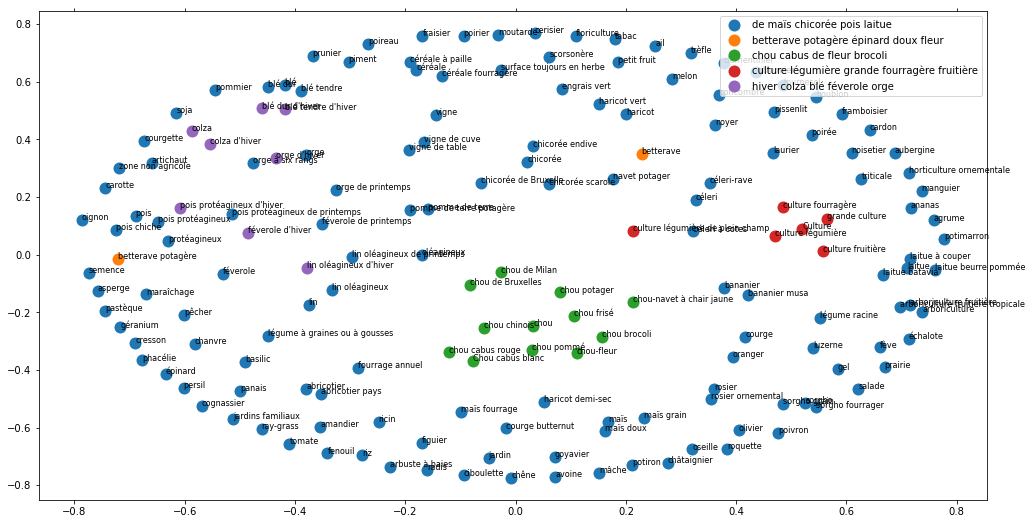

In [203]:
%matplotlib inline 


    
cluster_names = {0: 'de maïs chicorée pois laitue',
                 1: 'betterave potagère épinard doux fleur',
                 2: "chou cabus de fleur brocoli",
                 3: 'culture légumière grande fourragère fruitière',
                 4: 'hiver colza blé féverole orge'}
                 

#create data frame that has the result of the MDS plus the cluster numbers and titles
dff = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=words)) 

#group by cluster
groups = dff.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the title
for i in range(len(dff)):
    ax.text(dff.loc[i]['x'], dff.loc[i]['y'], dff.loc[i]['title'], size=8)  

    
    
plt.show()

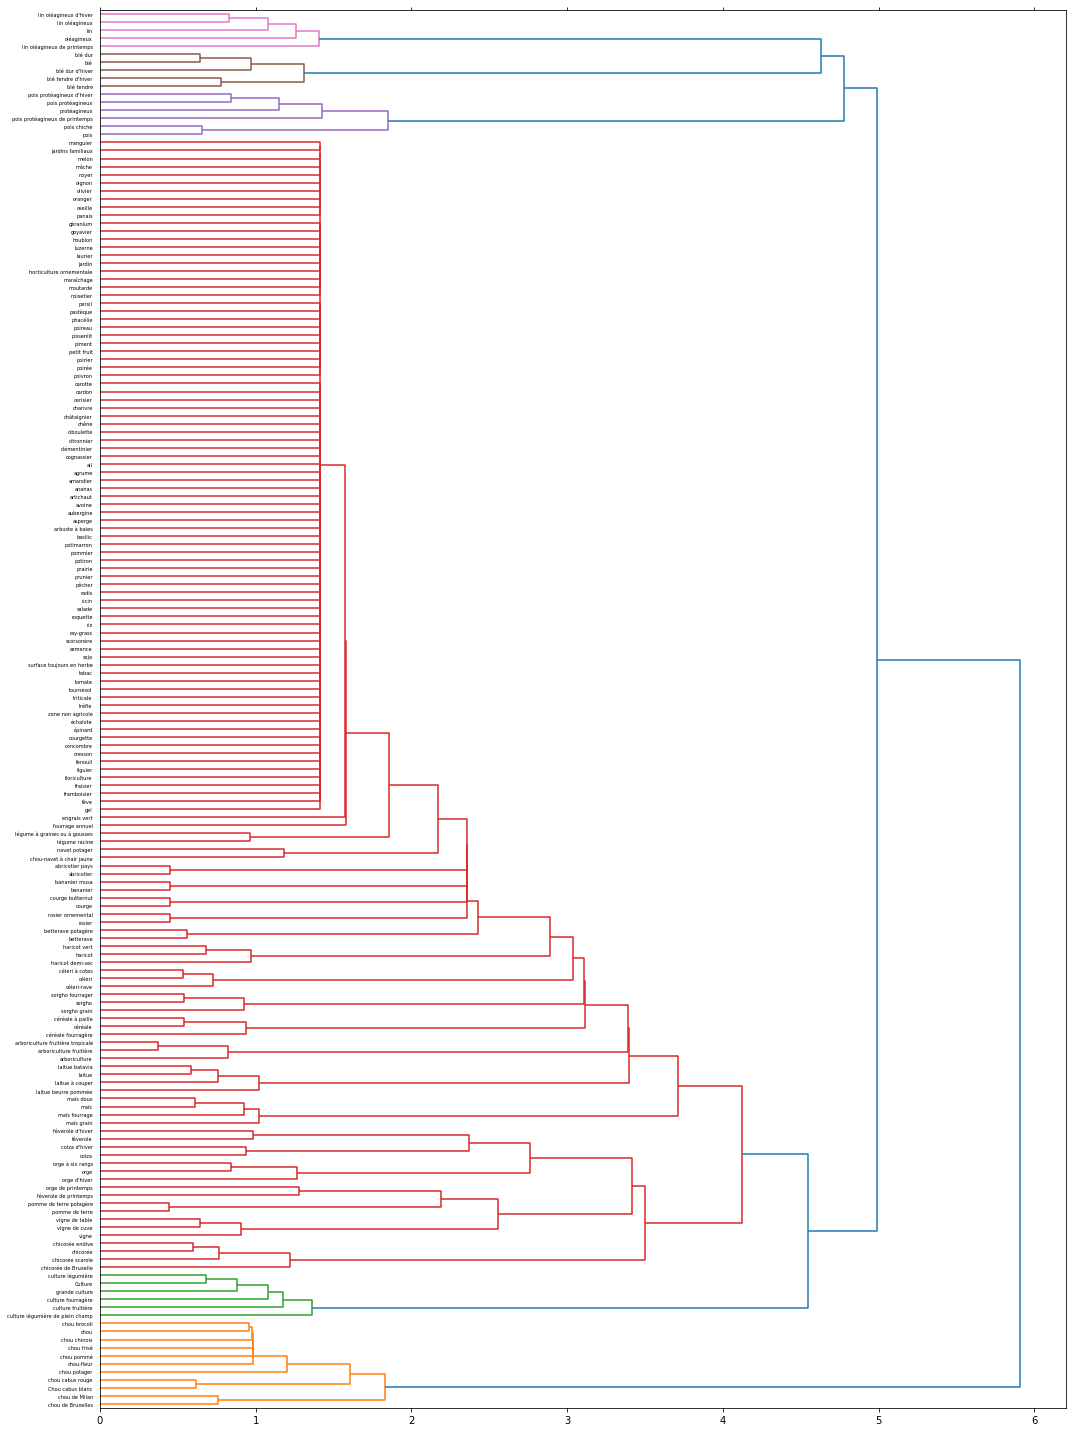

In [204]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=words);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [124]:
# Dimensionality reduction using PCA, reduce the tfidf matrix to just 2 features
from sklearn.decomposition import PCA

X = tfidf_matrix.todense()
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

print("X_pca now has just 2 columns:")
print(X_pca)

X_pca now has just 2 columns:
[[ 0.48674334  0.03136364]
 [-0.07074129 -0.22142127]
 [-0.02714814 -0.06772768]
 [-0.02714814 -0.06772768]
 [-0.02164931 -0.05209257]
 [-0.02164931 -0.05209257]
 [-0.02164931 -0.05209257]
 [-0.02164931 -0.05209257]
 [-0.04104599 -0.11867611]
 [-0.05337183 -0.16132117]
 [-0.04971799 -0.14900669]
 [-0.02164931 -0.05209257]
 [-0.02164931 -0.05209257]
 [-0.02164931 -0.05209257]
 [-0.02164931 -0.05209257]
 [-0.02164931 -0.05209257]
 [-0.02714814 -0.06772768]
 [-0.02714814 -0.06772768]
 [-0.02164931 -0.05209257]
 [-0.02626993 -0.06164697]
 [-0.02191935 -0.03976734]
 [-0.17071413  0.04531433]
 [-0.16767851  0.04801141]
 [-0.25178804  0.20074503]
 [-0.16767851  0.04801141]
 [-0.25178804  0.20074503]
 [-0.02164931 -0.05209257]
 [-0.02164931 -0.05209257]
 [-0.02164931 -0.05209257]
 [-0.02164931 -0.05209257]
 [-0.02452807 -0.03530709]
 [ 0.03935896  0.18298355]
 [-0.02510584 -0.04303994]
 [-0.02510584 -0.04303994]
 [ 0.83621539  0.10095597]
 [ 0.53856165  0.04617578

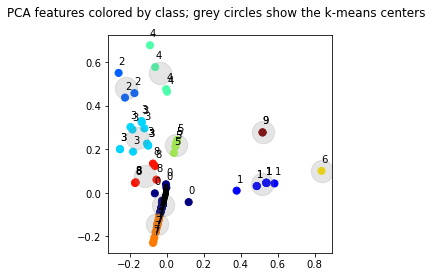

In [125]:
km_model = KMeans(n_clusters=10, max_iter=10, n_init=2, random_state=0)

# K-means (from number of features in input matrix to n_clusters)
km_model.fit(X_pca)
df_centers = pd.DataFrame(km_model.cluster_centers_, columns=['x', 'y'])

plt.figure(figsize=(4,4))
plt.suptitle('PCA features colored by class; grey circles show the k-means centers')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km_model.labels_, s=50, cmap='jet')
plt.scatter(df_centers['x'], df_centers['y'], c='grey', s=500, alpha=0.2);

dy = 0.04
for i, txt in enumerate(km_model.labels_):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1] + dy))